# Gráficos (Tarea 08)


In [2]:
import pandas as pd
import numpy as np
import pyreadr
from pandas import DataFrame,Series

#plots library

import matplotlib.pyplot as plt
import seaborn as sns

# import linear models library

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
user = os.getlogin()   # Username
os.chdir(f"Z:/Users/henryandreumarquezsalinas/Documents/GitHub")

In [3]:
data_env = pyreadr.read_r("../First-Repository/wage2015_subsample_inference.Rdata")

In [4]:
data = data_env[ 'data' ]

In [5]:
data # esta será nuestra base de datos

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4
18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.81,0.729,0.6561,4700,16,4970,9
32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.44,1.728,2.0736,4110,13,8680,20
32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,1.21,1.331,1.4641,1550,4,3680,6


# 1) Histograma

In [9]:
# Dummy sexo

data['Dummy'] =  np.where(data["sex"] > 0.0 , 1, 0)

Text(0.5, 0, '')

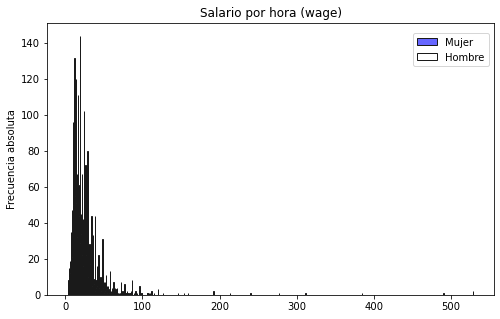

In [10]:
fig = plt.subplots(figsize=(8,5))

sns.histplot(data = data,
            x = "wage",
            alpha = 0.6,
            hue = 'Dummy',  # crear dos histogramas
            palette=['white','blue'],
            edgecolor="0.1", # borde de las barras
            linewidth=1, # ancho del borde
             binwidth=0.5 # ancho de la barra
            )


# Modificar la leyenda 
plt.legend(labels=['Mujer','Hombre'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.98))

plt.title('Salario por hora (wage)', size=12)
plt.ylabel('Frecuencia absoluta')
plt.xlabel('')

Text(0.5, 0, '')

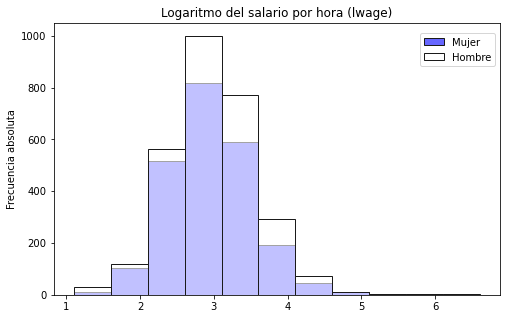

In [11]:
fig = plt.subplots(figsize=(8,5))

sns.histplot(data = data,
            x = "lwage",
            alpha = 0.6,
            hue = 'Dummy',  # crear dos histogramas
            palette=['white','blue'],
            edgecolor="0.1", # borde de las barras
            linewidth=1, # ancho del borde
             binwidth=0.5 # ancho de la barra
            )


# Modificar la leyenda 
plt.legend(labels=['Mujer','Hombre'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.98))

plt.title('Logaritmo del salario por hora (lwage)', size=12)
plt.ylabel('Frecuencia absoluta')
plt.xlabel('')

Comparación: 

Luego de graficar ambos histogramas queda claro que el segundo, en el que se emplea el logaritmo de los salarios (lwage), es el más recomendable. Esto porque dada la reducción de los valores por el empleo del logaritmo, permite apreciar de mejor forma el gráfico. La gran diferencia entre los salarios en el primer histograma generaba que el rango de x sea excesivamente amplio.

# 2) Gráfico de densidad

In [12]:
# Planteamos una dummy para la universidad completa

data['Dummy2'] =  np.where(data["hsg"] > 0.0 , 1, 0)

Text(0.5, 0, '')

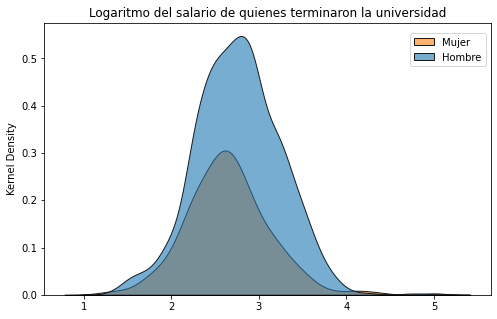

In [13]:
# Generamos el gráfico solicitado

fig = plt.subplots(figsize=(8,5))

#kdeplot : función de densidad 

sns.kdeplot(data = data[data.Dummy2 == 1], # empleamos solo aquellos que hayan terminado la universidad
            x = 'lwage',
            hue = 'Dummy',
            alpha = 0.6,
            edgecolor="0.1",
            linewidth=1,
             fill=True
            )

# Leyenda
plt.legend(labels=['Mujer','Hombre'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.98))
plt.title('Logaritmo del salario de quienes terminaron la universidad', size=12)
plt.ylabel('Kernel Density')
plt.xlabel('')

# 3) Gráfico Pie

In [14]:
# Agrupamos las dummies y pedimos su tamaño
base = data.groupby(['shs','hsg','scl','clg','ad']).size()
base

shs  hsg  scl  clg  ad 
0.0  0.0  0.0  0.0  1.0     706
               1.0  0.0    1636
          1.0  0.0  0.0    1432
     1.0  0.0  0.0  0.0    1256
1.0  0.0  0.0  0.0  0.0     120
dtype: int64

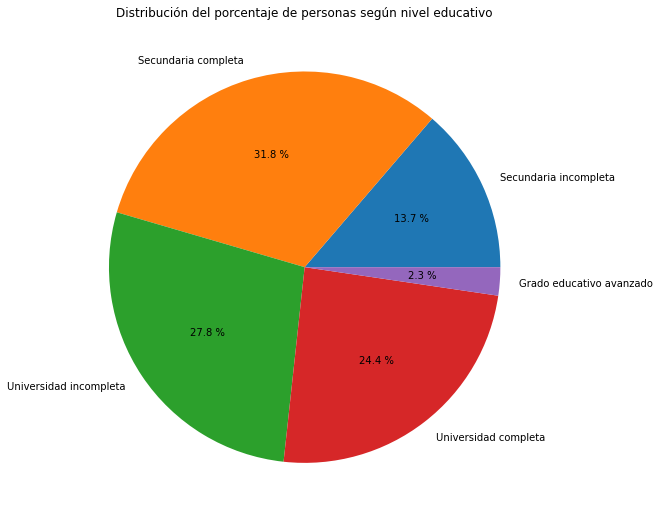

In [16]:
# Le damos nombres a las partes del gráfico

labels=['Secundaria incompleta', 'Secundaria completa' , 'Universidad incompleta', 'Universidad completa', 'Grado educativo avanzado']

# Generamos el gráfico pie
plt.figure(figsize=(9,9)) # tamaño de gráfico 

ax = plt.pie(base, labels=labels, autopct='%.1f %%')
plt.title('Distribución del porcentaje de personas según nivel educativo')
plt.show()

# 4) Diagrama de cajas

In [17]:
# Planteamos la dummy para mayor nivel educativo (ad)

data['Dummy3'] =  np.where(data["ad"] > 0.0 , 1, 0)

[Text(0, 0, 'Hombre'), Text(1, 0, 'Mujer')]

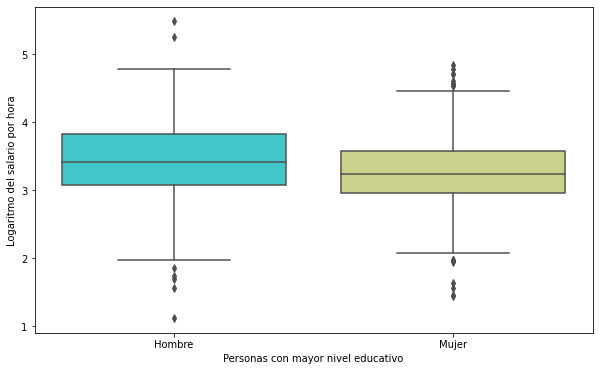

In [18]:
# Generamos el gráfico solicitado

fig, ax = plt.subplots(figsize=(10,6))

# Con la dummy creada, empleamos solamente a aquellos que posean el mayor nivel educativo

box = sns.boxplot(data = data[data.Dummy3 == 1], x='sex', y='lwage', palette='rainbow')
plt.xlabel('Personas con mayor nivel educativo')
plt.ylabel('Logaritmo del salario por hora')
(box.set_xticklabels(["Hombre", "Mujer"])) # etiqueta del eje x 